In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# 1. Load Dataset

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. EDA (Exploratory Data Analysis)

## Melihat Informasi Dasar Dataset

- Menampilkan tipe data setiap kolom dan jumlah data.
- Menunjukkan statistik dasar (mean, std, min, max, dll) untuk memahami sebaran data.

In [38]:
print("Info Dataset :")
print(df.info())
print("\nDeskripsi Statistik :")
print(df.describe())

Info Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB
None

Deskripsi Statistik :
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2460.000000  2460.000000    2460.000000    2460.000000  2460.000000   
mean      3.817480   121.602033      6

## Cek Missing Values

- Mengidentifikasi apakah ada data yang kosong/hilang di setiap kolom.
- Penting untuk menentukan strategi handling missing values.

In [39]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Visualisasi Distribusi Kelas Target

- Menampilkan jumlah data untuk setiap kelas (Diabetes/Non-Diabetes).
- Membantu mengidentifikasi apakah data balanced atau imbalanced.

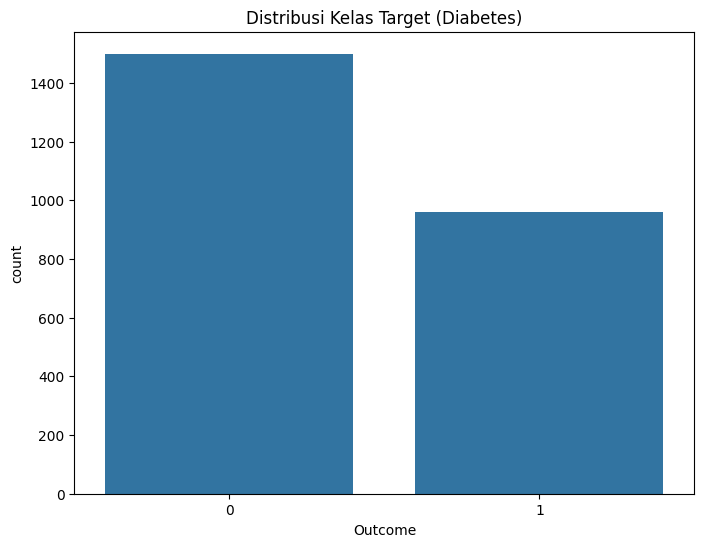

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Outcome')
plt.title('Distribusi Kelas Target (Diabetes)')
plt.show()

## Visualisasi Korelasi

- Menunjukkan hubungan antar variabel
- Warna merah = korelasi positif kuat
- Warna biru = korelasi negatif kuat

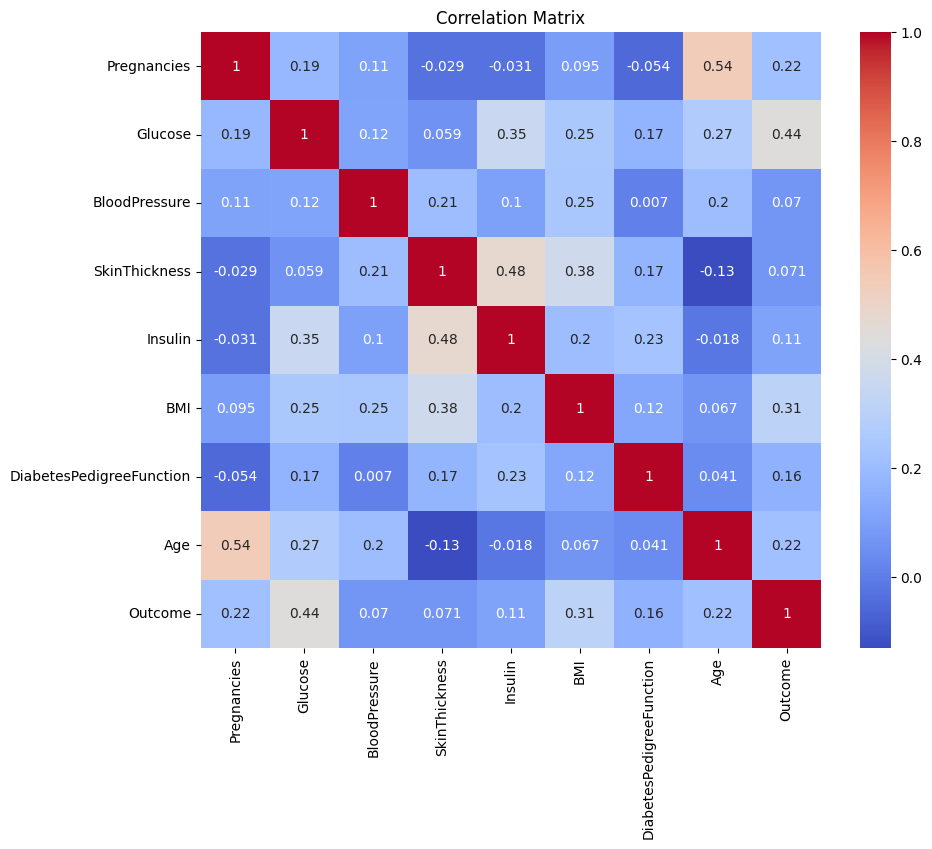

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Deteksi Outlier

- Mengidentifikasi data yang berada jauh dari sebaran normal (outlier).
- Titik-titik di luar box = outlier potensial.

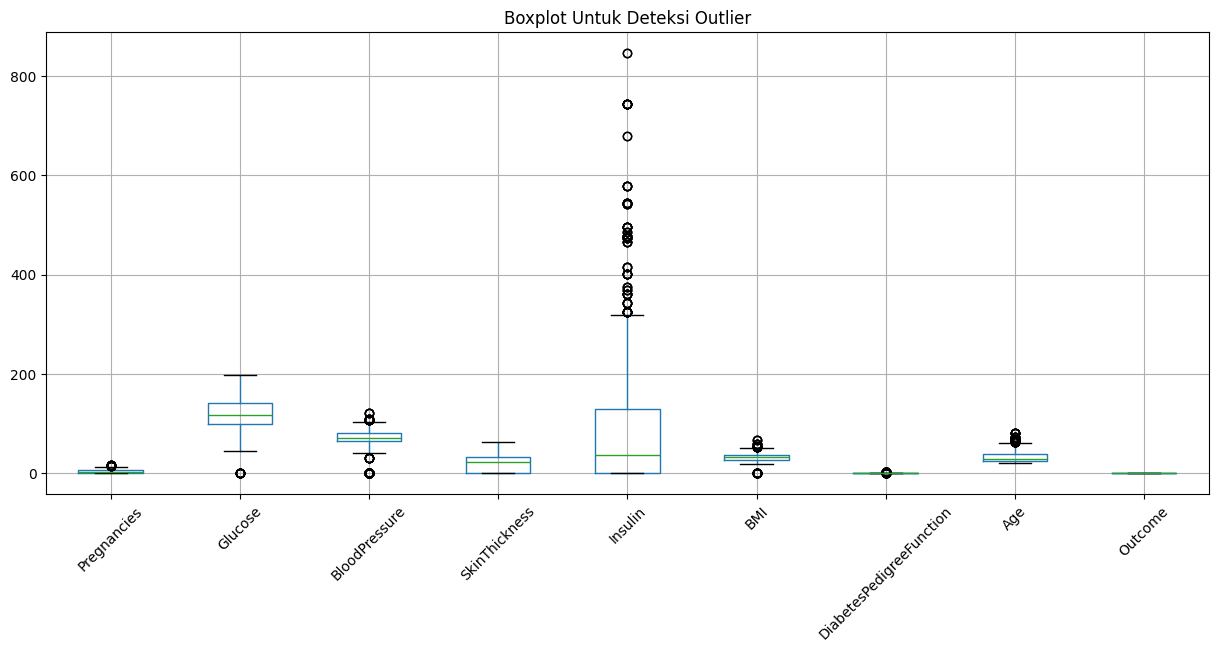

In [42]:
plt.figure(figsize=(15,6))
df.boxplot()
plt.title('Boxplot Untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

# 3. Pre-Processing

## Memisahkan Fitur Dan Target

- X : variabel independen (fitur)
- y : variabel dependen (target/outcome)

In [43]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Standardisasi Fitur

- Menyamakan skala data ke mean=0 dan std=1.
- Penting untuk algoritma yang sensitif terhadap skala seperti KNN.

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data

- Membagi data : 80% training, 20% testing
- random_state=42 untuk reproducibility
- X_train & y_train untuk melatih model
- X_test & y_test untuk evaluasi model

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Modeling Algoritma Klasifikasi & Evaluasi

## Fungsi Untuk Evaluasi Model

### Interpretasi Metrik :

- Accuracy : Persentase prediksi benar dari total prediksi
- Recall : Kemampuan model mengidentifikasi kasus positif
- Precision : Akurasi prediksi positif

Confusion Matrix : Visualisasi Detail Prediksi

- True Positive (TP) : Prediksi diabetes benar
- True Negative (TN) : Prediksi non-diabetes benar
- False Positive (FP) : Salah prediksi diabetes
- False Negative (FN) : Salah prediksi non-diabetes

In [46]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)

    print(f"\nEvaluasi Model {model_name}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"Precision : {prec:.4f}")

    print("\nConfusion Matrix :")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return acc, rec, prec

## Klasifikasi Metode KNN


Evaluasi Model KNN
Accuracy  : 0.9350
Recall    : 0.9144
Precision : 0.9144

Confusion Matrix :


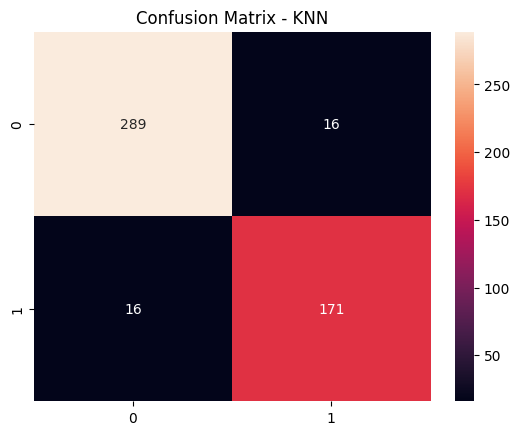

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
metrics_knn = evaluate_model(y_test, y_pred_knn, "KNN")

## Klasifikasi Metode Decision Tree


Evaluasi Model Decision Tree
Accuracy  : 0.9980
Recall    : 0.9947
Precision : 1.0000

Confusion Matrix :


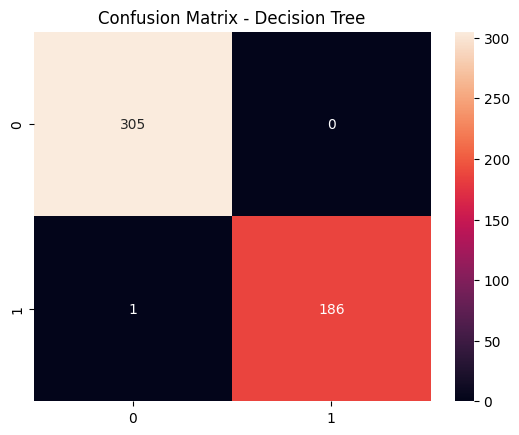

In [48]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
metrics_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")

## Klasifikasi Metode Naive Bayes


Evaluasi Model Naive Bayes
Accuracy  : 0.7175
Recall    : 0.5775
Precision : 0.6429

Confusion Matrix :


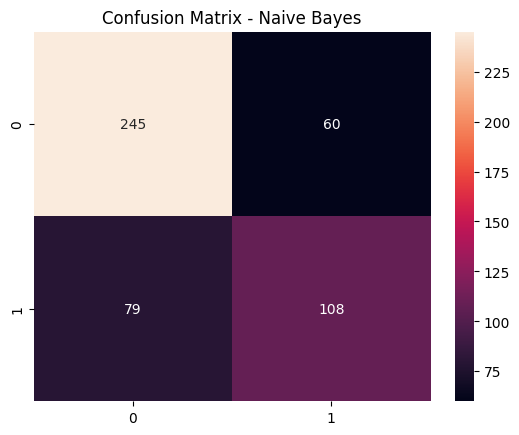

In [49]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
metrics_nb = evaluate_model(y_test, y_pred_nb, "Naive Bayes")

## Perbandingan Metode Klasifikasi

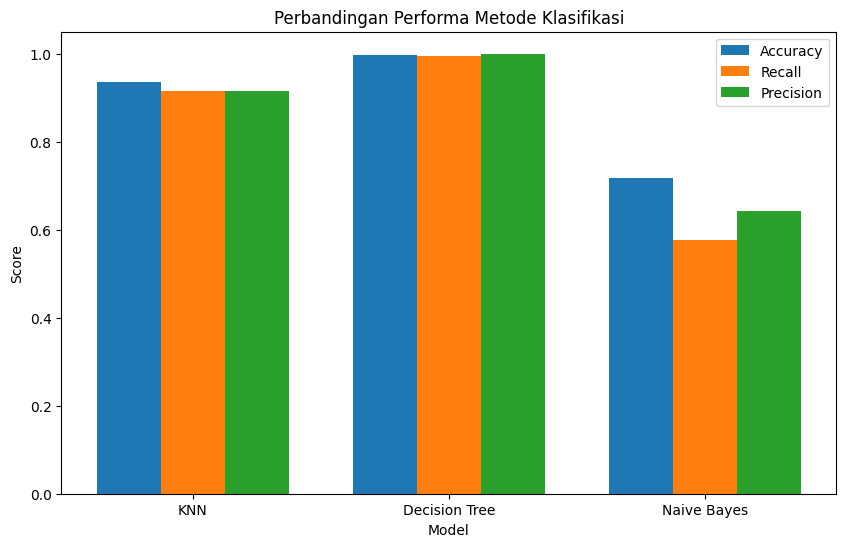

In [50]:
models = ['KNN', 'Decision Tree', 'Naive Bayes']
metrics = np.array([metrics_knn, metrics_dt, metrics_nb])

plt.figure(figsize=(10,6))
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, metrics[:,0], width, label='Accuracy')
plt.bar(x, metrics[:,1], width, label='Recall')
plt.bar(x + width, metrics[:,2], width, label='Precision')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perbandingan Performa Metode Klasifikasi')
plt.xticks(x, models)
plt.legend()
plt.show()

## Kesimpulan

In [51]:
best_acc_idx = np.argmax(metrics[:,0])
best_rec_idx = np.argmax(metrics[:,1])
best_prec_idx = np.argmax(metrics[:,2])

print("\n<<<<< KESIMPULAN >>>>>")
print(f"Metode Dengan Accuracy Terbaik  : {models[best_acc_idx]}")
print(f"Metode Dengan Recall Terbaik    : {models[best_rec_idx]}")
print(f"Metode Dengan Precision Terbaik : {models[best_prec_idx]}")


<<<<< KESIMPULAN >>>>>
Metode Dengan Accuracy Terbaik  : Decision Tree
Metode Dengan Recall Terbaik    : Decision Tree
Metode Dengan Precision Terbaik : Decision Tree
